<a href="https://www.kaggle.com/code/selensalman/digit-recognize-with-cnn?scriptVersionId=116483254" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Digit Recognize on MNIST dataset with CNN**

In this study, it was classified image of a handwritten digit with convolutional neural networks.
I explained the necessary informations about this topic in my articles named [Regression](http://https://medium.com/@salmanselen/image-classification-on-mnist-dataset-by-logistic-regression-b159d62f3c06) and [CNN](https://salmanselen.medium.com/cnn-modeli-ile-rakam-tan%C4%B1ma-4804099099c3). In addition, I mentioned both the parameters of the model and image classification process. I recommend you to read before browsing the codes.

**1.** I downloaded data.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


The data files train.csv and test.csv contain gray-scale images of hand-drawn digits, from zero through nine.

Each image is 28 pixels in height and 28 pixels in width. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

In [2]:
train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')
submission = pd.read_csv('/kaggle/input/digit-recognizer/sample_submission.csv')

* **The training dataset (train.csv)** is a numpy array of 42000. It has 785 columns. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.
* **The test data set (test.csv)** is the same as the training set, except that it does not contain the "label" column. It is a numpy array of 28000.
* **The submission file (sample_submission.csv)** consists of ImageId and Label columns. Our task is to print the number we guessed on the Label opposite in the ImageId for each of the 28000 images in the test set. For example, guessing that the first image is 3, the second image is 7, and the third image is 8.

In [3]:
train_y = train["label"]
train_x = train.drop(labels = ["label"],axis = 1)

In [4]:
train_x.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


*I separated the label and pixel values.*

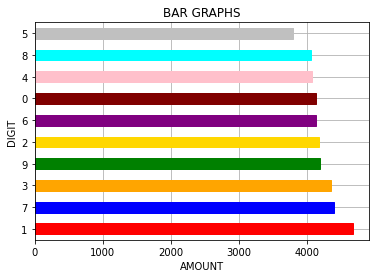

In [5]:
import matplotlib as plot

ax = train_y.value_counts().plot(kind='barh')
ax.set_title("BAR GRAPHS")
ax.set_ylabel("DIGIT")
ax.set_xlabel("AMOUNT")
ax.grid(True)
ax.set_axisbelow(True)

for color, bar in zip(['red','blue','orange','green', 'gold', 'purple', 'maroon', 'pink', 'cyan', 'silver' ], ax.patches):
    bar.set_color(color)

*I visualized the total amount of digits. The digit of **1** is more than the other digits.*

**2.** I did make data ready for use.


In [6]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.utils import to_categorical

mms = MinMaxScaler()
train_x = mms.fit_transform(train_x)
train_x = train_x.reshape(-1, 28, 28, 1)
train_y = to_categorical(train_y, num_classes = 10)

* Normalize the data with the MinMax method.
* Shape the 28x28 three-dimensional image matrix to two-dimensional for input to the neural network.
* Since the labels is a categorical data, we need to encode the data with one hot encoding before training.

In [7]:
from sklearn.model_selection import train_test_split
train_x, val_x, train_y,val_y = train_test_split(train_x, train_y, test_size=0.1, random_state=42)

> Let's show some pictures in the dataset.

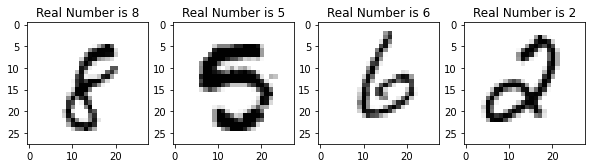

In [8]:
import matplotlib.pyplot as plot

train__x = train_x.reshape(train_x.shape[0], 28, 28)

fig, axis = plot.subplots(1, 4, figsize=(10, 8))
for i, ax in enumerate(axis.flat):
    ax.imshow(train__x[i], cmap='binary')
    digit = train_y[i].argmax()
    ax.set(title = f"Real Number is {digit}");

**3.** Now let's create our model.

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', input_shape=(28, 28, 1),
activation='relu', name='Convolution-1'))
model.add(MaxPooling2D(name='MaxPooling2D-1'))
model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu', name='Convolution-2'))
model.add(MaxPooling2D(name='MaxPooling2D-2'))
model.add(Flatten(name='Flatten'))
model.add(Dense(128, activation='relu', name='Hidden-1'))
model.add(Dense(128, activation='relu', name='Hidden-2'))
model.add(Dense(10, activation='softmax', name='Output'))

2023-01-16 09:05:24.716483: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


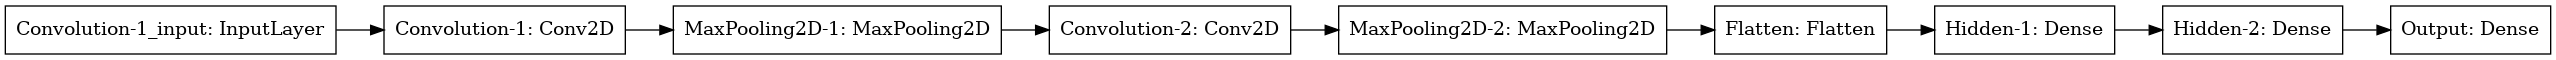

In [10]:
from keras.utils.vis_utils import plot_model

plot_model(model, rankdir = 'LR')

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Convolution-1 (Conv2D)       (None, 28, 28, 32)        320       
_________________________________________________________________
MaxPooling2D-1 (MaxPooling2D (None, 14, 14, 32)        0         
_________________________________________________________________
Convolution-2 (Conv2D)       (None, 14, 14, 64)        18496     
_________________________________________________________________
MaxPooling2D-2 (MaxPooling2D (None, 7, 7, 64)          0         
_________________________________________________________________
Flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
Hidden-1 (Dense)             (None, 128)               401536    
_________________________________________________________________
Hidden-2 (Dense)             (None, 128)               1

*From this summary information, you can see that the 28x28 matrices obtained as a result of the convolution operation are first reduced to 14x14 and then to 7x7. After the pooling processes, the number of parameters of the model, which was around 6 million, was reduced to around 400 thousand.*

In [12]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
history = model.fit(train_x, train_y, epochs=5, batch_size=64, validation_split = 0.2)

2023-01-16 09:05:26.285089: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5
473/473 [==============================] - 14s 29ms/step - loss: 0.2380 - categorical_accuracy: 0.9262 - val_loss: 0.0843 - val_categorical_accuracy: 0.9730
Epoch 2/5
473/473 [==============================] - 13s 27ms/step - loss: 0.0607 - categorical_accuracy: 0.9804 - val_loss: 0.0571 - val_categorical_accuracy: 0.9817
Epoch 3/5
473/473 [==============================] - 13s 29ms/step - loss: 0.0398 - categorical_accuracy: 0.9874 - val_loss: 0.0548 - val_categorical_accuracy: 0.9854
Epoch 4/5
473/473 [==============================] - 13s 27ms/step - loss: 0.0277 - categorical_accuracy: 0.9909 - val_loss: 0.0470 - val_categorical_accuracy: 0.9877
Epoch 5/5
473/473 [==============================] - 13s 27ms/step - loss: 0.0215 - categorical_accuracy: 0.9926 - val_loss: 0.0472 - val_categorical_accuracy: 0.9877


**4.** Let's look at some graphics.

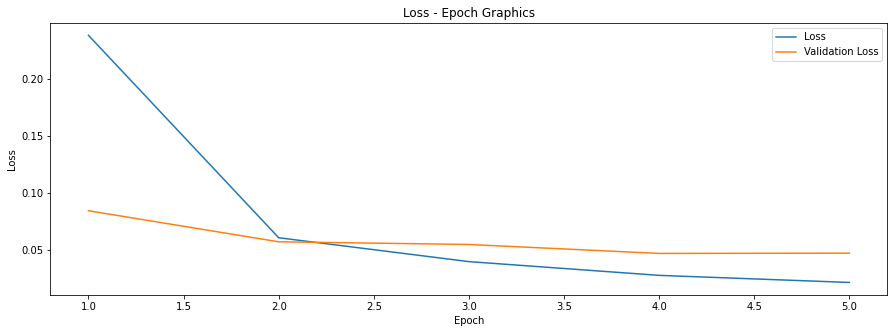

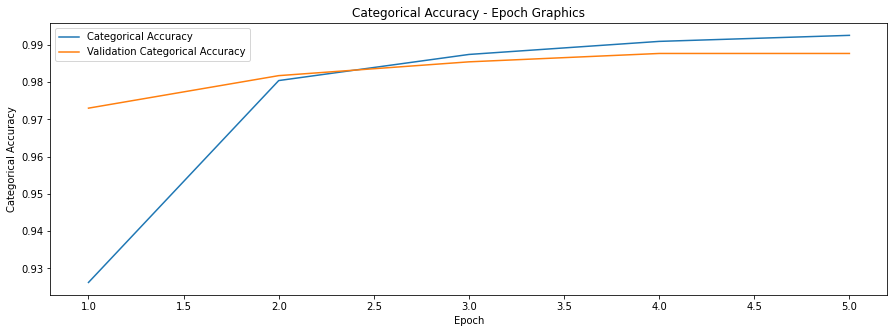

In [13]:
import matplotlib.pyplot as plt
figure = plt.gcf()
figure.set_size_inches((15, 5))
plt.title('Loss - Epoch Graphics')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(range(1, len(history.history['loss']) + 1), history.history['loss'])
plt.plot(range(1, len(history.history['val_loss']) + 1), history.history['val_loss'])
plt.legend(['Loss', 'Validation Loss'])
plt.show()

figure = plt.gcf()
figure.set_size_inches((15, 5))
plt.title('Categorical Accuracy - Epoch Graphics')
plt.xlabel('Epoch')
plt.ylabel('Categorical Accuracy')
plt.plot(range(1, len(history.history['categorical_accuracy']) + 1),
history.history['categorical_accuracy'])
plt.plot(range(1, len(history.history['val_categorical_accuracy']) + 1),
history.history['val_categorical_accuracy'])
plt.legend(['Categorical Accuracy', 'Validation Categorical Accuracy'])
plt.show()

*According to these graphs, as the number of epoch increases, "overfit" suspicion appears. It is sufficient that the number of epoch is 2 or 3.*

**5.** We have to test our model.

In [14]:
eval_result = model.evaluate(val_x, val_y)
for i in range(len(eval_result)):
    print(f'{model.metrics_names[i]} --> {eval_result[i]}')

132/132 [==============================] - 1s 5ms/step - loss: 0.0350 - categorical_accuracy: 0.9888
loss --> 0.03495272621512413
categorical_accuracy --> 0.9888095259666443


**6.** Forecast...

In [15]:
test = mms.fit_transform(test)
test = test.reshape(-1,28,28,1)

*Before forcasting, normalize the test data and shape the 28x28 three-dimensional image matrix to two-dimensional.*
* **My submission file is in the following format:**

In [16]:
pred = model.predict(test)
classes = pred.argmax(axis=-1)
submission.Label = classes
submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [17]:
submission.to_csv("my_submission.csv", index=False, header=True)